In [1]:
# Importing the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
sb.set()

# Import and cleaning up of dataset

>- We will first import the dataset

In [2]:
# Import data set + glimpse of the data
df1 = pd.read_csv('xAPI-Edu-Data.csv')
df1.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


>- We will then tidy up the column names and drop unwanted predictors
>- Removal of duplicates

In [3]:
# Check for duplicate entries
dupid_data = df1[df1.duplicated(keep = False)]
dupid_data.head()

# Removing the duplicates
df1.drop_duplicates(inplace=True,keep='first')
df1.reset_index(inplace=True,drop=True)

# Number of students
print("Number of students:", df1.shape[0])

# Check the index and number of rows
df1 

Number of students: 478


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
476,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
# Some of the attributes have random capitalisations. 
# Tidy up the column names
df1.rename(index=str, columns={'gender':'Gender', 'PlaceofBirth':'PlaceOfBirth', 'NationalITy':'Nationality',
'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources', 'Class':'ScoreRange'}, inplace=True)
# Dropping of unwanted variables and creating a new clean dataframe based on EDA
df1_cleaned = df1.drop(['Nationality','PlaceOfBirth','StageID','GradeID','SectionID'], axis=1, inplace=False)
df1_cleaned

,Gender,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,ScoreRange
0,M,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
473,F,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
474,F,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
475,F,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
476,F,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Main Problem Definition: 

### What range will a student's score (low, medium or high) be given its attributes? </br>

>- This is a multi-classification problem.
>- We will use the selected predicted variables to predict ScoreRange.
>- ScoreRange is categorised into L, M and H.
>- We will now split df1_cleaned into data (Predictor Variables) and SR_Data that contains ScoreRange (Response variable).

In [5]:
# Dataframe containing the predictor variables
data=df1_cleaned.drop(columns=["ScoreRange"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 477
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    478 non-null    object
 1   Topic                     478 non-null    object
 2   Semester                  478 non-null    object
 3   Relation                  478 non-null    object
 4   RaisedHands               478 non-null    int64 
 5   VisitedResources          478 non-null    int64 
 6   AnnouncementsView         478 non-null    int64 
 7   Discussion                478 non-null    int64 
 8   ParentAnsweringSurvey     478 non-null    object
 9   ParentschoolSatisfaction  478 non-null    object
 10  StudentAbsenceDays        478 non-null    object
dtypes: int64(4), object(7)
memory usage: 44.8+ KB


In [6]:
# Dataframe containing our Response Variable
SR_data = df1_cleaned['ScoreRange']

>- We use train_test_split to randomly split the data into train and test sets, with test_size = 0.2

In [7]:
# Split the dataset into train and test sets using train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, SR_data,test_size=0.2,random_state=None)

# Building the pipeline

>- We will first define the columns depending on their data type
>- One hot encoding will be applied to categorical columns
>- Numerical scaling will be applied to numerical columns
>- We will then create the transformer


In [8]:
# Use a selector to split numerical and categorical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

# Apply one hot encoding on categorical columns and numerical scaling on numerical columns
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

# Create the transformer and associate the preprocessors with their respective columns
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

# Test out different classification models
We combine the transformer with different classifiers in a pipeline in order to find out with classifier is the best

>- model1: logistic regression
>- model2: decision trees
>- model3: random forest
>- model4: support vector machine
>- model5: k nearest neighbours

We will determine which is the best based on the score of the model based on the train-test split.


# Helper Functions

In [9]:
# Visualisation functions
def visualise(possible_values, scores, xlabel, title):
    plt.figure(figsize=(20,10))
    plt.plot(possible_values,scores,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
    plt.ylabel('Score')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

def visualise_bar(DF, xlabel, ylabel, title):
    DF.rename(index=str, columns={'1':'Logistic Regression', '2':'Decision Tree', '3':'Random Forest',
              '4':'Support Vector Machine', '5':'K Nearest Neighbors'}, inplace=True)
    plt.figure(figsize=(14,8))
    g = sb.barplot(data=DF)
    g.set(ylabel=ylabel, xlabel=xlabel, title=title)
    for bar in g.patches:
        g.annotate('{:.3f}'.format(bar.get_height()), (bar.get_x()+0.31, bar.get_height()-0.05))
    plt.show()

In [10]:
# Value Generation
def generate_values(possible_values,start,max,jump):
    i = start
    while i <= max:
        possible_values.append(i)
        i += jump

    return possible_values

# Printing of optimising value and classification accuracy
def print_report(dict, score_n, str1, model):
    best_value = max(dict, key=dict.get)
    score_n = dict.get(best_value)
    print("Best " + str1 + " value:", best_value)
    print("Best classification accuracy score of " + model + " on test set:", score_n)

    return score_n

def print_reportCV(dict, CVscore_n, str1, model):
    best_value = max(dict, key=dict.get)
    CVscore_n = dict.get(best_value)
    print("Best " + str1 + " value:", best_value)
    print("Optimised CV score of " + model + ":", CVscore_n)

    return CVscore_n

# Model1: Logistic regression
>- Optimising the C-value of Logistic Regression to get a better classification accuracy on test set.

In [11]:
# Create lists and dictionaries to store the C-values and corresponding scores
possible_C=[]
scores = []
scores_LG = {}

# Generate the C-values
generate_values(possible_values = possible_C, start=0.1, max=3, jump= 0.05)

# Use a for loop to find the C-value that gives us the best score
for i in possible_C:
    model1 = make_pipeline(preprocessor, LogisticRegression(C=i,max_iter=1000))
    model1.fit(data_train, target_train)
    score1=model1.score(data_test, target_test)
    scores.append(score1)
    scores_LG[i]=score1

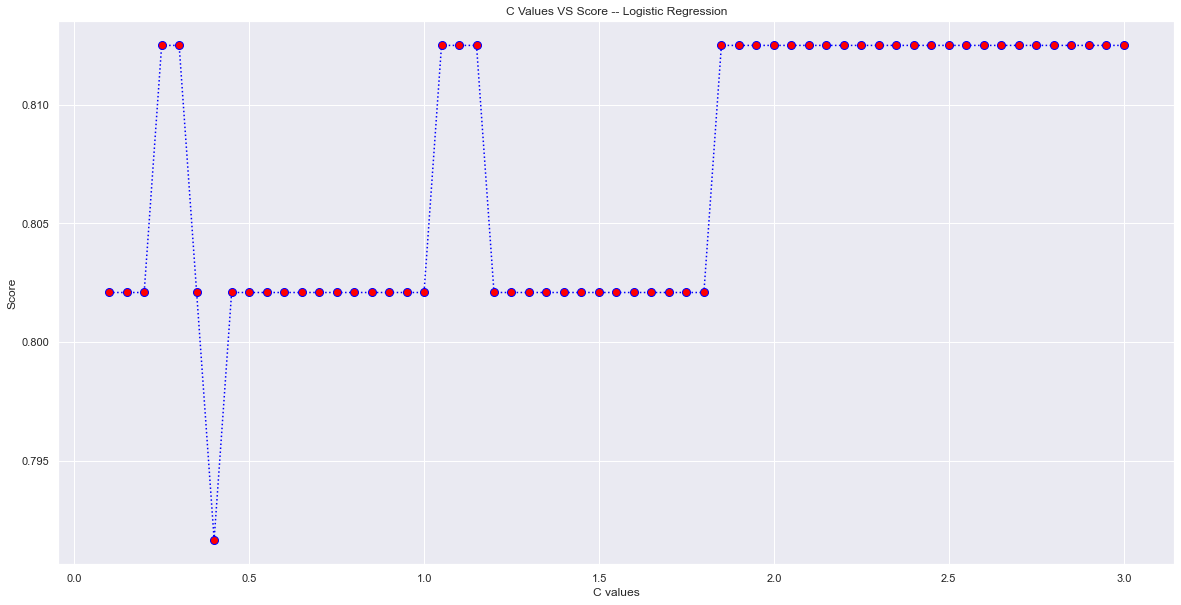

In [12]:
# Visualisation of C-value vs Score on test set
visualise(possible_values=possible_C, scores=scores, xlabel='C values', title='C Values VS Score -- Logistic Regression')

In [13]:
score1 = print_report(dict = scores_LG, score_n=score1, str1='C', model='Logistic Regression')

Best C value: 0.25
Best classification accuracy score of Logistic Regression on test set: 0.8125


# Model2: Decision tree
>- Optimising of Max-depth to get the best score on Test-set and prevent overfitting of train-set.

In [14]:
# Create lists and dictionaries to store the max-depth values and corresponding scores
possible_M=[]
scores = []
scores_DT = {}

# Generate Max Depth Values
generate_values(possible_values = possible_M, start=1, max=10, jump= 1)

# Use a for loop to find the max-depth that gives us the best score
for depth in possible_M:
    model2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=depth))
    model2.fit(data_train, target_train)
    score2=model2.score(data_test, target_test)
    scores.append(score2)
    scores_DT[depth] = score2


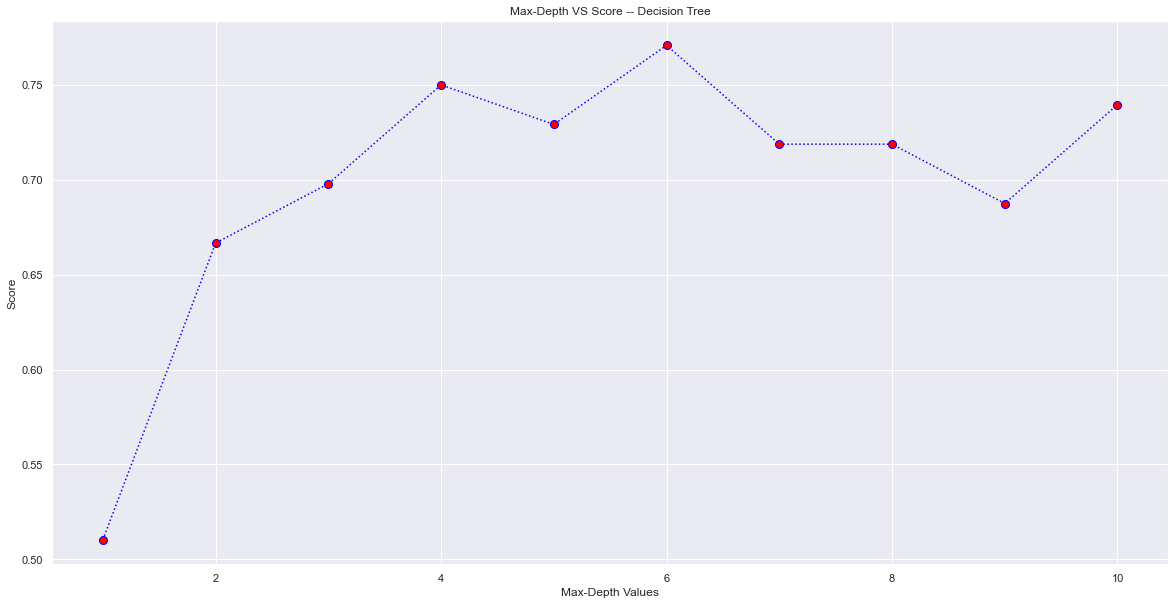

In [15]:
# Visualisation of Max-Depth vs Score on test set
visualise(possible_values=possible_M, scores=scores, xlabel='Max-Depth Values', title='Max-Depth VS Score -- Decision Tree')

In [16]:
# Print best max depth to use for the decision tree and the corresponding classification accuracy
score2 = print_report(dict = scores_DT, score_n=score2, str1='Max Depth', model='Decision Tree')

Best Max Depth value: 6
Best classification accuracy score of Decision Tree on test set: 0.7708333333333334


# Model3: Random forest

>- Optimising Max-depth of RandomForestClassifier to get the best score.

In [17]:
# Create lists and dictionaries to store the Max-depth values and corresponding scores
possible_M=[]
scores = []
scores_RF = {}

# Generate max-depth values
generate_values(possible_values = possible_M, start=1, max=10, jump= 1)

# Use a for loop to find the max-depth that gives us the best score
for depth in possible_M:
    model3 = make_pipeline(preprocessor, RandomForestClassifier(max_depth=depth))
    model3.fit(data_train, target_train)
    score3=model3.score(data_test, target_test)
    scores.append(score3)
    scores_RF[depth] = score3

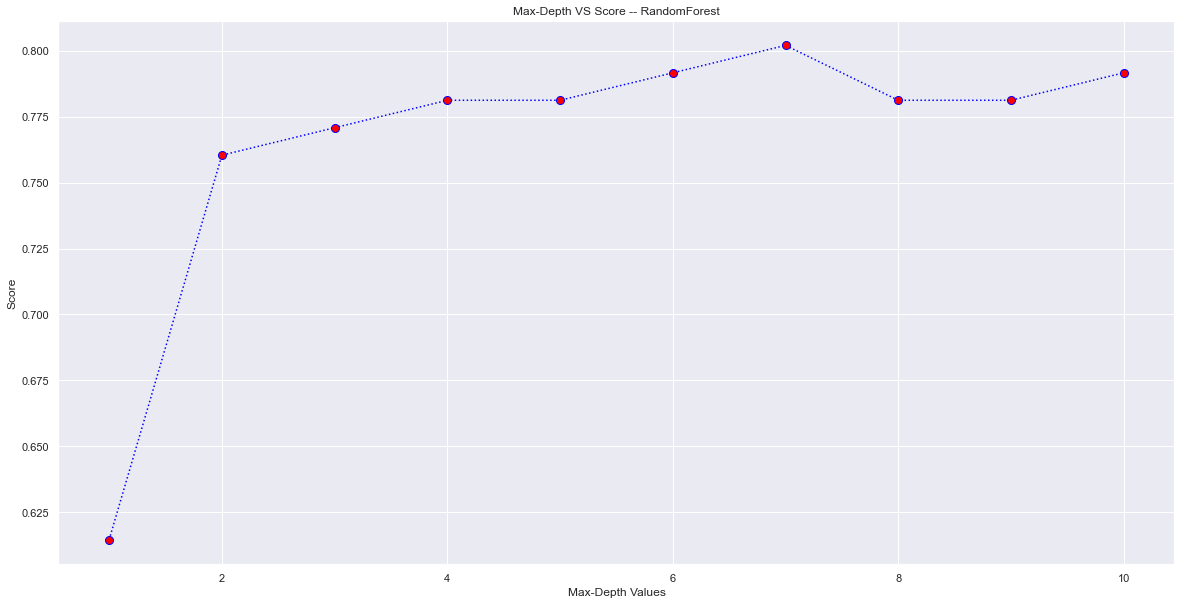

In [18]:
# Visualisation of Max-Depth vs Score on test set
visualise(possible_values=possible_M, scores=scores, xlabel='Max-Depth Values', title='Max-Depth VS Score -- RandomForest')

In [19]:
# Print best max depth to use for the random forest and the corresponding classification accuracy
score3 = print_report(dict = scores_RF, score_n=score3, str1='Max Depth', model='Random Forest')

Best Max Depth value: 7
Best classification accuracy score of Random Forest on test set: 0.8020833333333334


# Model4: Support vector machine

>- Optimising the C-value of SVM to get a better classification accuracy on test set.

In [20]:
# Create lists and dictionaries to store the C-values and corresponding scores
possible_C=[]
scores = []
scores_SVM = {}

# Generate the C-values
generate_values(possible_values = possible_C, start=0.1, max=3, jump= 0.05)


# Use a for loop to find the C-value that gives us the best score
for i in possible_C:
    model4 = make_pipeline(preprocessor, SVC(C=i))
    model4.fit(data_train, target_train)
    score4 = model4.score(data_test, target_test)
    scores.append(score4)
    scores_SVM[i]=score4

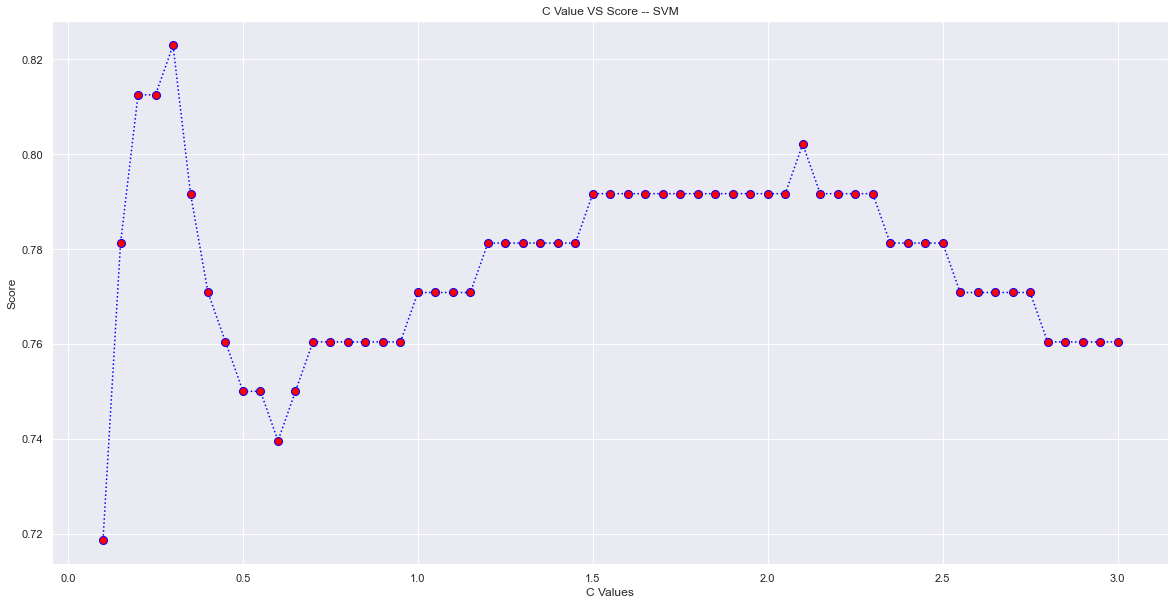

In [21]:
# Visualisation of the C-values and their corresponding scores
visualise(possible_values=possible_C, scores=scores, xlabel='C Values', title='C Value VS Score -- SVM')

In [22]:
# Print the best C-value and the corresponding score
score4 = print_report(dict = scores_SVM, score_n=score4, str1='C', model='SVM')

Best C value: 0.3
Best classification accuracy score of SVM on test set: 0.8229166666666666


# Model 5: K Nearest Neighbours

In [23]:
# Create lists and dictionaries to store the max-depth values and corresponding scores
possible_K=[]
scores = []
scores_KNN = {}

# Generate the K-values
generate_values(possible_values = possible_K, start=1, max=100, jump= 1)


# Use a for loop to find the K value that gives us the best score
for k in possible_K:
    model5 = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
    model5.fit(data_train, target_train)
    score5=model5.score(data_test, target_test)
    scores_KNN[k]=score5
    scores.append(score5)

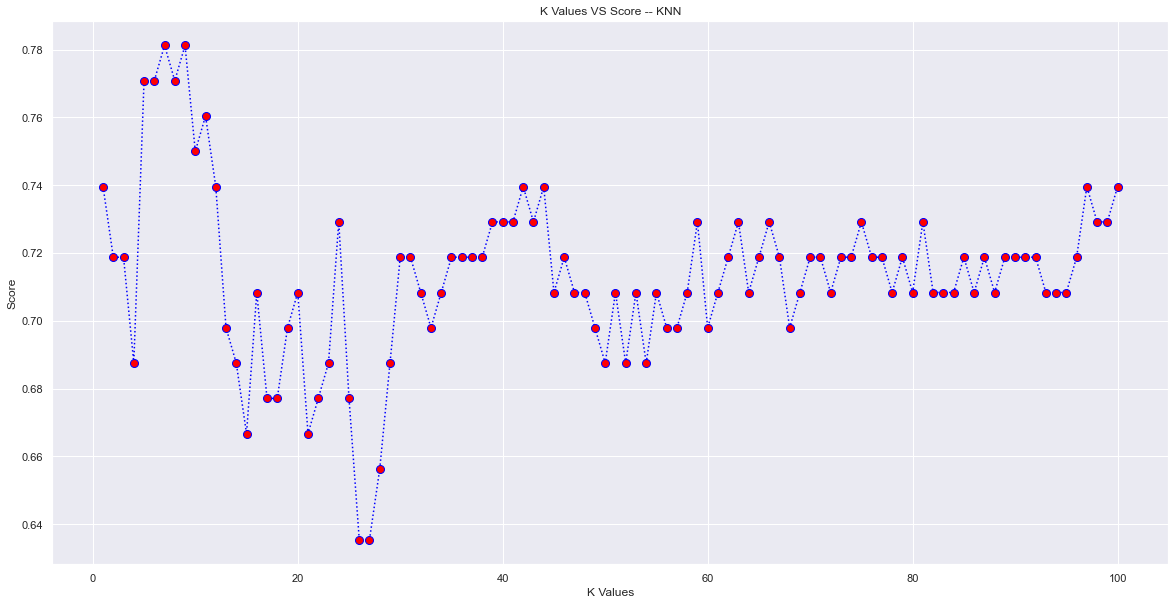

In [24]:
# Visualise K values Vs Score
visualise(possible_values= possible_K, scores=scores, xlabel='K Values', title='K Values VS Score -- KNN')

In [25]:
# Print the best K-value and the corresponding score
score5 = print_report(dict = scores_KNN, score_n=score5, str1='K', model='KNN')

Best K value: 7
Best classification accuracy score of KNN on test set: 0.78125


# Sub-problem 1:
>- Which Machine-Learning model is the best model to predict a student's score range?

Comparison of classification accuracy across the 5 models on train-test split:
Model1: 0.8125
Model2: 0.7708333333333334
Model3: 0.8020833333333334
Model4: 0.8229166666666666
Model5: 0.78125


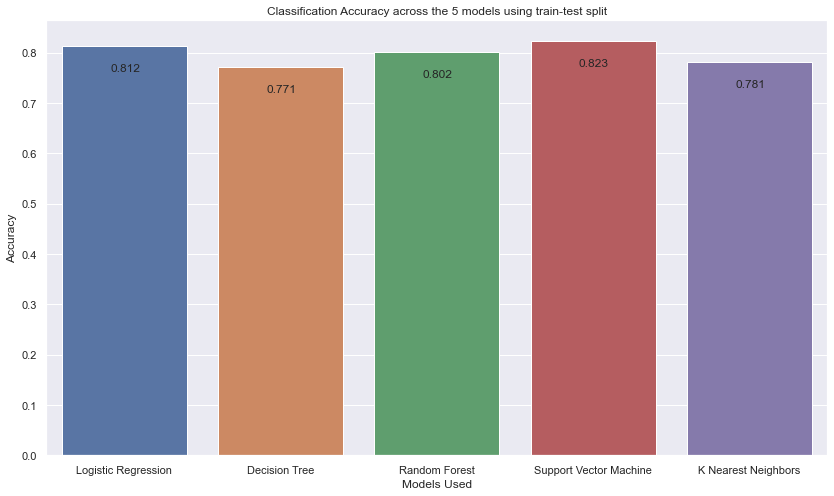

In [26]:
# Create a clean df for visualising the score comparison
df = pd.DataFrame()

# Comparison of the classification accuracy (scores) across the 5 models ran once.
scores = [score1, score2, score3, score4, score5]
print("Comparison of classification accuracy across the 5 models on train-test split:")
i=1
for score in scores:
    print("Model" +str(i)+ ":", score)
    df.at[0,str(i)] = score
    i+=1

# Plot simple graph to visualise the scores 
visualise_bar(DF=df, xlabel='Models Used', ylabel='Accuracy', title='Classification Accuracy across the 5 models using train-test split')

>- Model3, which uses the random forest classifier, gives us the highest classification accuracy most of the time.
>- It is noted that each models are optimised based on the specific random train-test split generated.

# Cross validation of the five models
As part of something new to learn, we are exploring cross-validation to compare the models instead of just using train-test split.

>- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
>- The procedure has a parameter cv that refers to the number of groups that a given data sample is to be split into.
>- We will be using default value of cv=5 which is a value commonly used.

### Cross validation of the 5 models without optimising the models

Comparison of mean CV accuracy across the 5 models:
Model1: 0.686 +/- 0.006
Model2: 0.626 +/- 0.031
Model3: 0.713 +/- 0.030
Model4: 0.684 +/- 0.014
Model5: 0.617 +/- 0.053


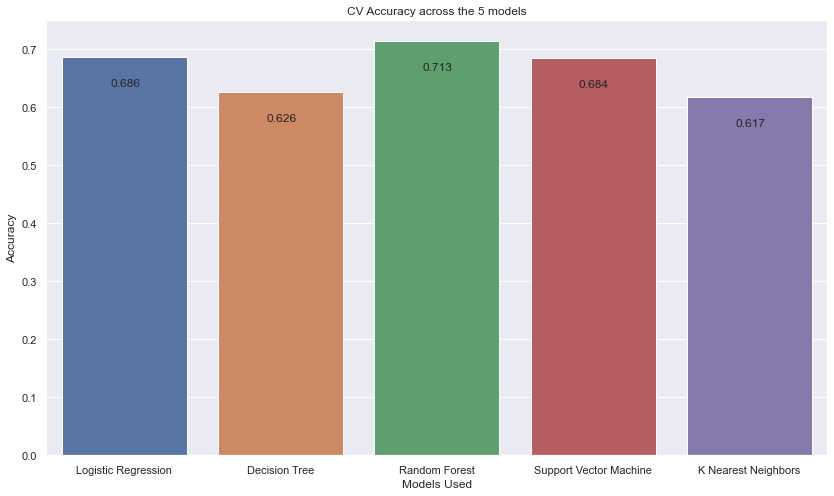

In [27]:
# Cross Validation without optimisation
model1 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
model1.fit(data_train,target_train)
model2 = make_pipeline(preprocessor, DecisionTreeClassifier())
model2.fit(data_train,target_train)
model3 = make_pipeline(preprocessor, RandomForestClassifier())
model3.fit(data_train,target_train)
model4 = make_pipeline(preprocessor, SVC())
model4.fit(data_train,target_train)
model5 = make_pipeline(preprocessor, KNeighborsClassifier())
model5.fit(data_train,target_train)
models=[model1,model2,model3,model4,model5]
i=1
CVA_df = pd.DataFrame()

# Comparison of the mean CV accuracy across the 5 models.
print("Comparison of mean CV accuracy across the 5 models:")
for model in models:
    cv_results = cross_validate(model, data, SR_data)
    scores = cv_results["test_score"]
    CVA_df.at[0,str(i)]=float(scores.mean())
    print("Model"+str(i)+":", f"{scores.mean():.3f} +/- {scores.std():.3f}")
    i+=1

# Plot simple graph to visualise the scores 
visualise_bar(DF=CVA_df, xlabel='Models Used', ylabel='Accuracy', title='CV Accuracy across the 5 models')

>- It is noted that RandomForestClassifier still gives us the best accuracy amongst the 5 models even with Cross-Validation.
>- However, the models are not optimised.
>- Therefore, we will retry the same procedure but with the models optimised in a similar way as the first section with train-test split.

# Logistic Regression - Optimised CV 

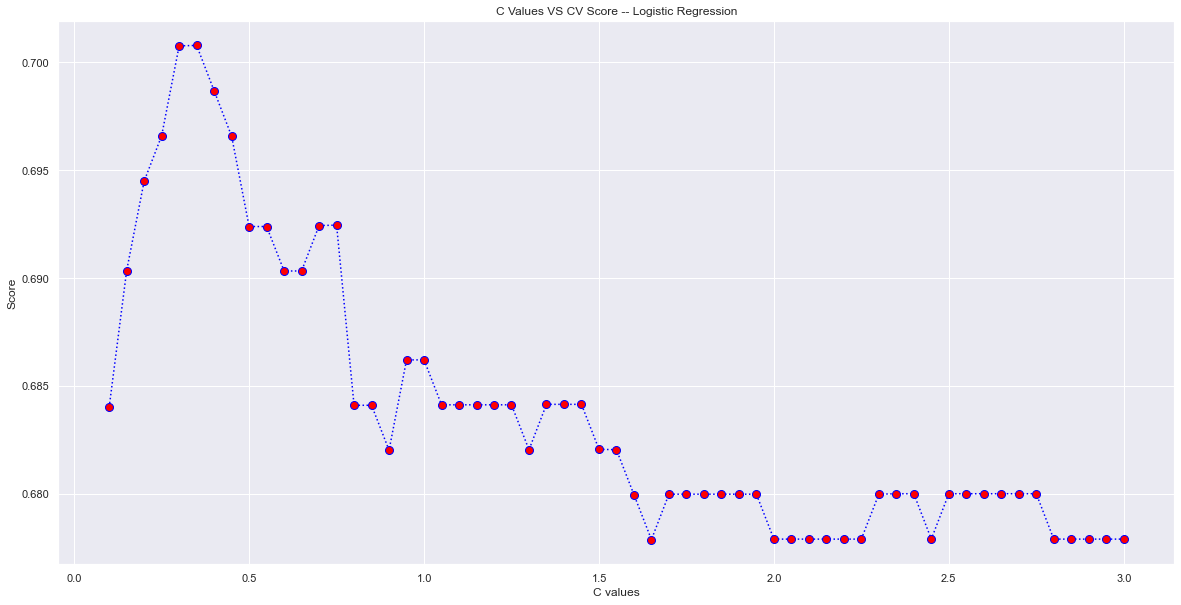

In [28]:
# Create lists and dictionaries to store the C-values and corresponding CV scores
possible_C=[]
scores = []
scores_LG = {}

# Use a while loop to generate the C-values
generate_values(possible_values = possible_C, start=0.1, max=3, jump= 0.05)

# Use a for loop to find the C-value that gives us the best CV score
for i in possible_C:
    model1 = make_pipeline(preprocessor, LogisticRegression(C=i,max_iter=1000))
    model1.fit(data, SR_data)
    cv_results = cross_validate(model1, data, SR_data)
    score1 = cv_results["test_score"].mean()
    scores.append(score1)
    scores_LG[i]=score1

# Visualisation of C-value vs CV Score 
visualise(possible_values=possible_C, scores=scores, xlabel='C values', title='C Values VS CV Score -- Logistic Regression')

In [29]:
# Print Optimised CV score
best_C_LG = max(scores_LG, key=scores_LG.get)
score1 = print_reportCV(dict = scores_LG, CVscore_n=score1, str1='C', model='Logistic Regression')

Best C value: 0.35
Optimised CV score of Logistic Regression: 0.7007894736842106


# Decision Tree - Optimised CV

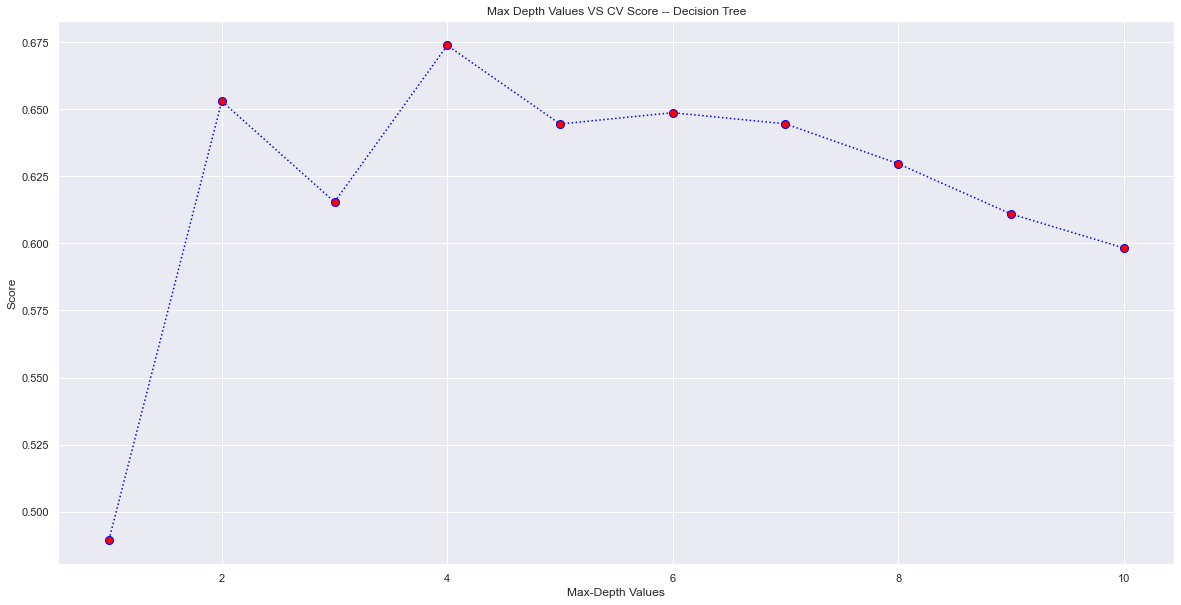

In [30]:
# Create lists and dictionaries to store the max-depth values and corresponding CV scores
possible_M=[]
scores = []
scores_DT = {}

# Use a while loop to generate the max-depth values
generate_values(possible_values = possible_M, start=1, max=10, jump=1)

# Use a for loop to find the max-depth that gives us the best CV score
for depth in possible_M:
    model2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=depth))
    model2.fit(data, SR_data)
    cv_results = cross_validate(model2, data, SR_data)
    score2 = cv_results["test_score"].mean()
    scores.append(score2)
    scores_DT[depth] = score2

# Visualisation of Max-Depth vs CV
visualise(possible_values=possible_M, scores=scores, xlabel='Max-Depth Values', title='Max Depth Values VS CV Score -- Decision Tree')

In [31]:
# Print best max depth to use for the decision tree and the corresponding CV score
best_max_depth_DT = max(scores_DT, key=scores_DT.get)
score2 = print_reportCV(dict = scores_DT, CVscore_n=score2, str1='Max Depth', model='Decision Tree')

Best Max Depth value: 4
Optimised CV score of Decision Tree: 0.67375


# Random Forest - Optimised CV

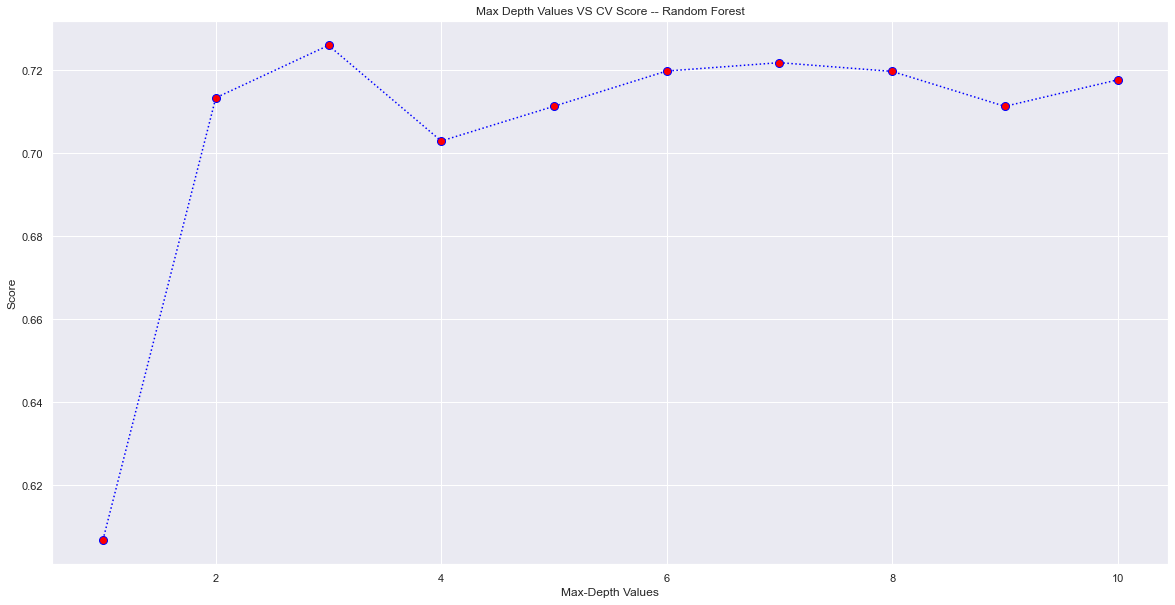

In [32]:
# Create lists and dictionaries to store the Max-depth values and corresponding CV scores
possible_M=[]
scores = []
scores_RF = {}

# Use a while loop to generate the max-depth values
generate_values(possible_values = possible_M, start=1, max=10, jump= 1)

# Use a for loop to find the max-depth that gives us the best CV score
for depth in possible_M:
    model3 = make_pipeline(preprocessor, RandomForestClassifier(max_depth=depth))
    model3.fit(data, SR_data)
    cv_results = cross_validate(model3, data, SR_data)
    score3 = cv_results["test_score"].mean()
    scores.append(score3)
    scores_RF[depth] = score3

# Visualisation of Max-Depth vs CV Score 
visualise(possible_values=possible_M, scores=scores, xlabel='Max-Depth Values', title='Max Depth Values VS CV Score -- Random Forest')

In [33]:
# Print best max depth to use for the random forest and the corresponding CV score
best_max_depth_RF = max(scores_RF, key=scores_RF.get)
score3 = print_reportCV(dict = scores_RF, CVscore_n=score3, str1='Max Depth', model='Random Forest')

Best Max Depth value: 3
Optimised CV score of Random Forest: 0.7259868421052632


# Support Vector Machine - Optimised CV

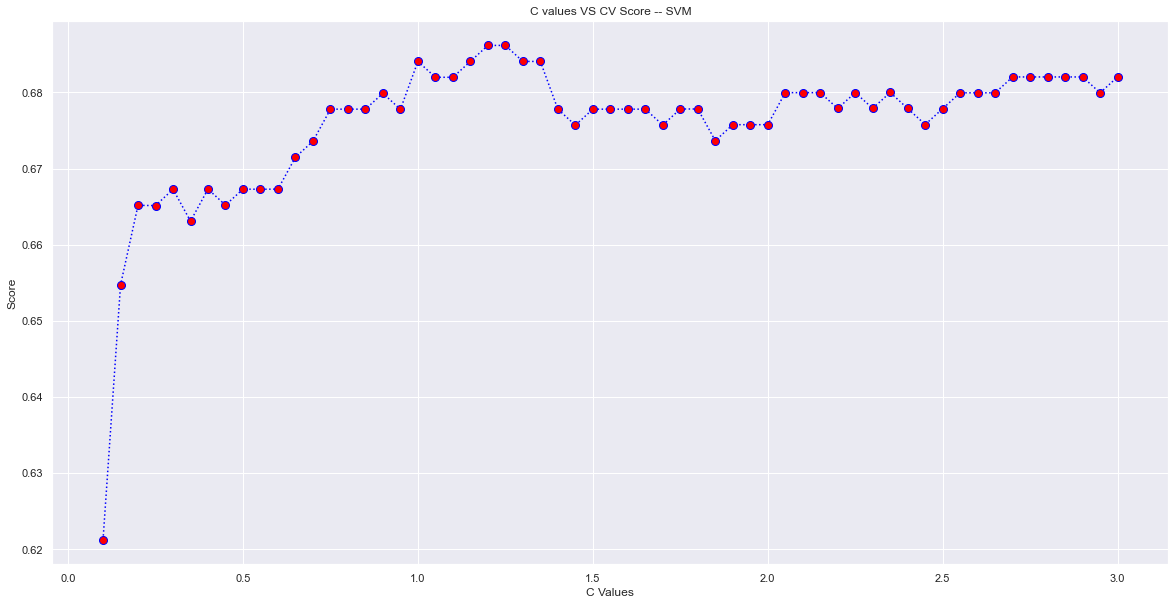

In [34]:
# Create lists and dictionaries to store the C-values and corresponding scores
possible_C=[]
scores = []
scores_SVM = {}

# Use a while loop to generate the C-values
generate_values(possible_values=possible_C, start=0.1, max=3, jump=0.05)

# Use a for loop to find the C-value that gives us the best score
for i in possible_C:
    model4 = make_pipeline(preprocessor, SVC(C=i))
    model4.fit(data, SR_data)
    cv_results = cross_validate(model4, data, SR_data)
    score4 = cv_results["test_score"].mean()
    scores.append(score4)
    scores_SVM[i]=score4

# Visualisation of C-Values VS CV Score
visualise(possible_values=possible_C, scores=scores, xlabel='C Values', title='C values VS CV Score -- SVM')

In [35]:
# Print best C value to use for the SVM and the corresponding CV score
best_C_SVM = max(scores_SVM, key=scores_SVM.get)
score4 = print_reportCV(dict = scores_SVM, CVscore_n=score4, str1='C', model='SVM')

Best C value: 1.2000000000000004
Optimised CV score of SVM: 0.6861842105263157


# K Nearest Neighbors - Optimised CV

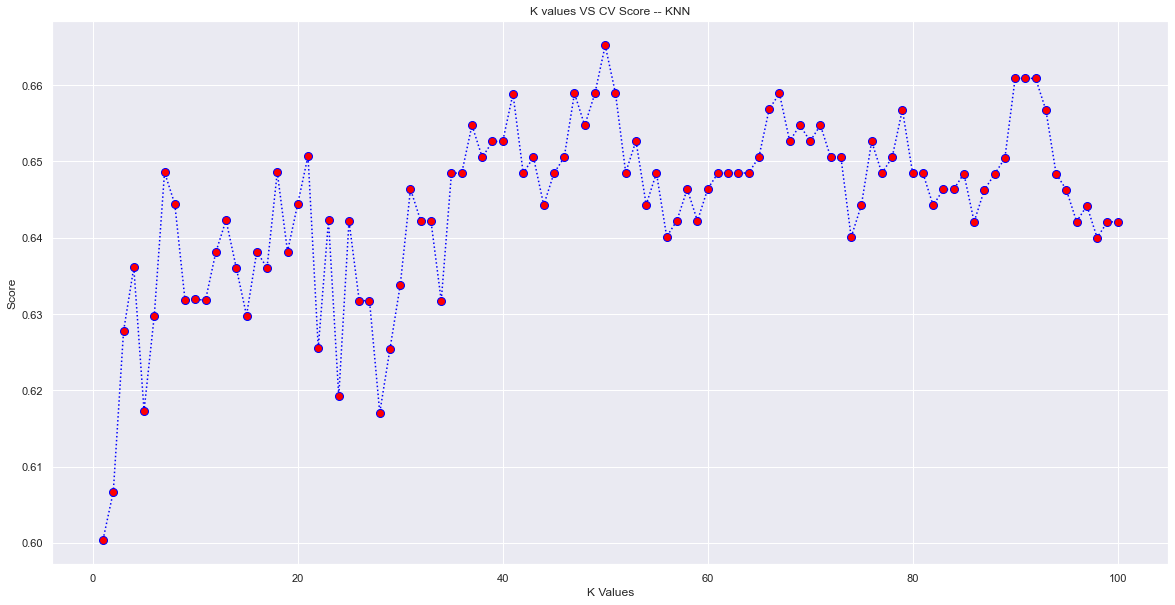

In [36]:
# Create lists and dictionaries to store the K values and corresponding CV scores
possible_K=[]
scores = []
scores_KNN = {}

# Generate the K-values
generate_values(possible_values = possible_K, start=1, max=100, jump= 1)

# Use a for loop to find the K value that gives us the best score
for i in possible_K:
    model5 = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=i))
    model5.fit(data, SR_data)
    cv_results = cross_validate(model5, data, SR_data)
    score5 = cv_results["test_score"].mean()
    scores_KNN[i]=score5
    scores.append(score5)

# Visualisation of K-Values VS CV Score
visualise(possible_values=possible_K, scores=scores, xlabel='K Values', title='K values VS CV Score -- KNN')

In [37]:
# Print best K value to use for the KNN and the corresponding CV score
best_K = max(scores_KNN, key=scores_KNN.get)
score5 = print_reportCV(dict = scores_KNN, CVscore_n=score5, str1='K', model='KNN')

Best K value: 50
Optimised CV score of KNN: 0.6651973684210526


# Comparing CV scores of optimsed vs non-optimised models

Comparison of optimised CV score across the 5 models:
Model1: 0.7007894736842106
Model2: 0.67375
Model3: 0.7134429824561404
Model4: 0.6861842105263157
Model5: 0.6651973684210526


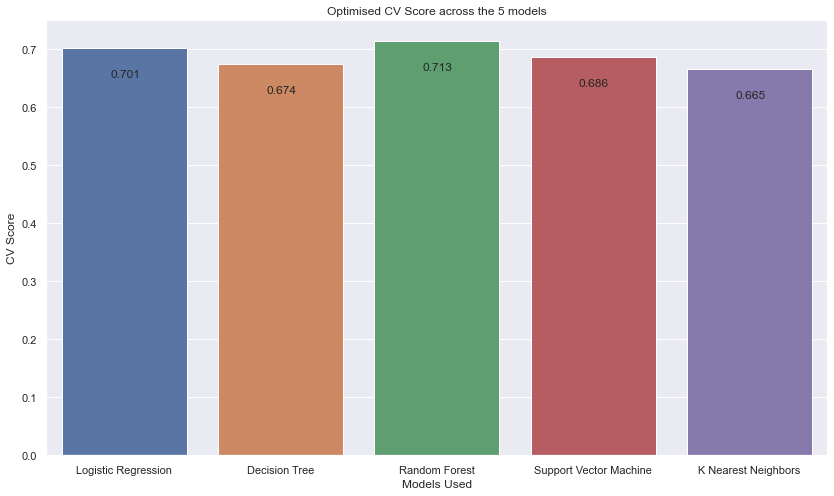

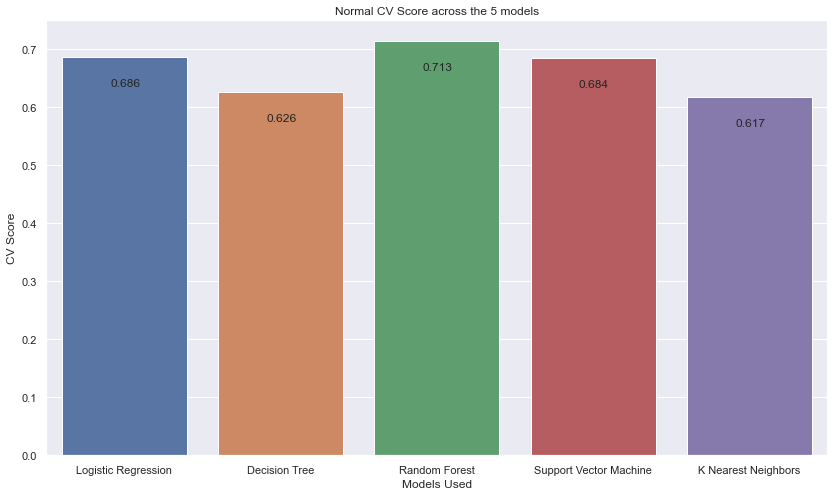

In [38]:
# Calculate score of optimised models
model1 = make_pipeline(preprocessor, LogisticRegression(C=best_C_LG,max_iter=1000))
model1.fit(data,SR_data)
cv_results = cross_validate(model1, data, SR_data)
score1 = cv_results["test_score"].mean()
model2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=best_max_depth_DT))
model2.fit(data,SR_data)
cv_results = cross_validate(model2, data, SR_data)
score2 = cv_results["test_score"].mean()
model3 = make_pipeline(preprocessor, RandomForestClassifier(max_depth=best_max_depth_RF))
model3.fit(data,SR_data)
cv_results = cross_validate(model3, data, SR_data)
score3 = cv_results["test_score"].mean()
model4 = make_pipeline(preprocessor, SVC(C=best_C_SVM))
model4.fit(data,SR_data)
cv_results = cross_validate(model4, data, SR_data)
score4 = cv_results["test_score"].mean()
model5 = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=best_K))
model5.fit(data,SR_data)
cv_results = cross_validate(model5, data, SR_data)
score5 = cv_results["test_score"].mean()

# Create a clean df for visualising the score comparison
df = pd.DataFrame()

# Comparison of the classification accuracy (scores) across the 5 models ran once.
scores = [score1, score2, score3, score4, score5]
print("Comparison of optimised CV score across the 5 models:")
i=1
for score in scores:
    print("Model" +str(i)+ ":", score)
    df.at[0,str(i)] = score
    i+=1

# Plot graphs to visualise and compare CV scores with and without optimisation
visualise_bar(DF=df, xlabel='Models Used', ylabel='CV Score', title='Optimised CV Score across the 5 models')
visualise_bar(DF=CVA_df, xlabel='Models Used', ylabel='CV Score', title='Normal CV Score across the 5 models')

>- On average, the scores across all 5 models have increased.
>- Random Forest remains as the best model with the highest score.

# Choice of model:
**RandomForestClassifier (model3)**

>- From our analysis, Model3 has the highest mean cross-validation accuracy. (With and without optimisation)
>- It also gives us the highest score above using train-test split.
>- Model3, which uses the random forest classifier, is the best model.

**Therefore,** we will use Model3 (random forest classifier) to predict a student's academic score based on its attributes


### Analysis of model

>- We now look at the confusion matrix for the selected model

Classification Accuracy of train set	: 0.824607329842932


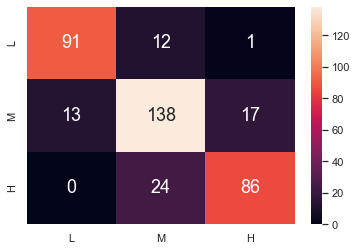

In [39]:
# Predict grade corresponding to data_train
model3 = make_pipeline(preprocessor, RandomForestClassifier(max_depth=best_max_depth_RF))
model3.fit(data_train,target_train)
target_train_predict = model3.predict(data_train)

# Print the Classification Accuracy
print("Classification Accuracy of train set\t:", model3.score(data_train, target_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(target_train, target_train_predict, labels=['L','M','H']), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels = ['L','M','H'], yticklabels = ['L','M','H'])
plt.show()

>- The classification accuracy is around 0.8 to 0.9 , meaning that the model is able to predict the train dataset quite accurately.

Classification Accuracy of test set	: 0.7604166666666666


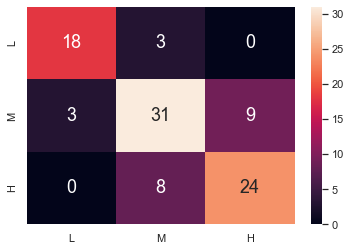

In [40]:
# Predict grade corresponding to data_test
target_test_predict = model3.predict(data_test)

# Print the Classification Accuracy
print("Classification Accuracy of test set\t:", model3.score(data_test, target_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(target_test, target_test_predict, labels=['L','M','H']), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels = ['L','M','H'], yticklabels = ['L','M','H'])
plt.show()

>- The classification accuracy for the test dataset is around 0.75-0.85, meaning the model is able to predict the test dataset accurately most of the time
>- Therefore, we are able to accurately predict a student's ScoreRange using the given predictors in the dataset and with RandomForest as our classifier.

# Sub-problem 2:
### Which attribute influences a student's score most?

>- We want to figure out which predictor has the largest impact on ScoreRange. 
>- There are several types of variables(numeric, category), it is hard to measure the importance of one variable through single variable prediction.
>- We are going to carry out this part using method of contrast. 
>- For every variable, we try to drop the specific variable and do prediction using the remaining variable.
>- The score of the prediction would decrease sharply compared to the original score if this specific variable is quite important. 

Here we apply the RandomForest model which has been shown to be the best model for classifying our response variable.

# Process

According to our planning, the flow is:

>- 1) Choose one specific predictor variable. 
>- 2) Get a temporary dataset without this variable.
>- 3) Do predictions about the temporary dataset.
>- 4) Calculate the accuracy of the prediction.
>- 5) Do this sequence for every variable. 

The variable whose prediction gets lowest accuracy is determined as the variable with highest impact.

In [43]:
columns=['Gender','Topic','Semester','Relation','RaisedHands','VisitedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
data_vis={}
for c in columns:
    temp_data=data.drop(columns=[c],axis=1, inplace=False)
    # use a selector to split numerical and categorical columns
    numerical_columns_selector = selector(dtype_exclude=object)
    categorical_columns_selector = selector(dtype_include=object)

    numerical_columns = numerical_columns_selector(temp_data)
    categorical_columns = categorical_columns_selector(temp_data)

    # apply one hot encoding on categorical columns and numerical scaling on numerical columns
    categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
    numerical_preprocessor = StandardScaler()
    
     #create the transformer and associate the preprocessors with their respective columns
    preprocessor2 = ColumnTransformer([
        ('one-hot-encoder', categorical_preprocessor, categorical_columns),
        ('standard_scaler', numerical_preprocessor, numerical_columns)])


    model = make_pipeline(preprocessor2, RandomForestClassifier(max_depth=best_max_depth_RF))
    model.fit(temp_data, SR_data)

    cv_results = cross_validate(model, temp_data, SR_data)
    scores = cv_results["test_score"]
    data_vis[c] = [c,scores.mean()]
    print(c+":","The mean cross-validation accuracy is: "
          f"{scores.mean():.3f} +/- {scores.std():.3f}")

Gender: The mean cross-validation accuracy is: 0.726 +/- 0.008
Topic: The mean cross-validation accuracy is: 0.722 +/- 0.017
Semester: The mean cross-validation accuracy is: 0.728 +/- 0.029
Relation: The mean cross-validation accuracy is: 0.668 +/- 0.040
RaisedHands: The mean cross-validation accuracy is: 0.709 +/- 0.033
VisitedResources: The mean cross-validation accuracy is: 0.701 +/- 0.025
AnnouncementsView: The mean cross-validation accuracy is: 0.718 +/- 0.012
Discussion: The mean cross-validation accuracy is: 0.720 +/- 0.030
ParentAnsweringSurvey: The mean cross-validation accuracy is: 0.730 +/- 0.033
ParentschoolSatisfaction: The mean cross-validation accuracy is: 0.718 +/- 0.018
StudentAbsenceDays: The mean cross-validation accuracy is: 0.592 +/- 0.019


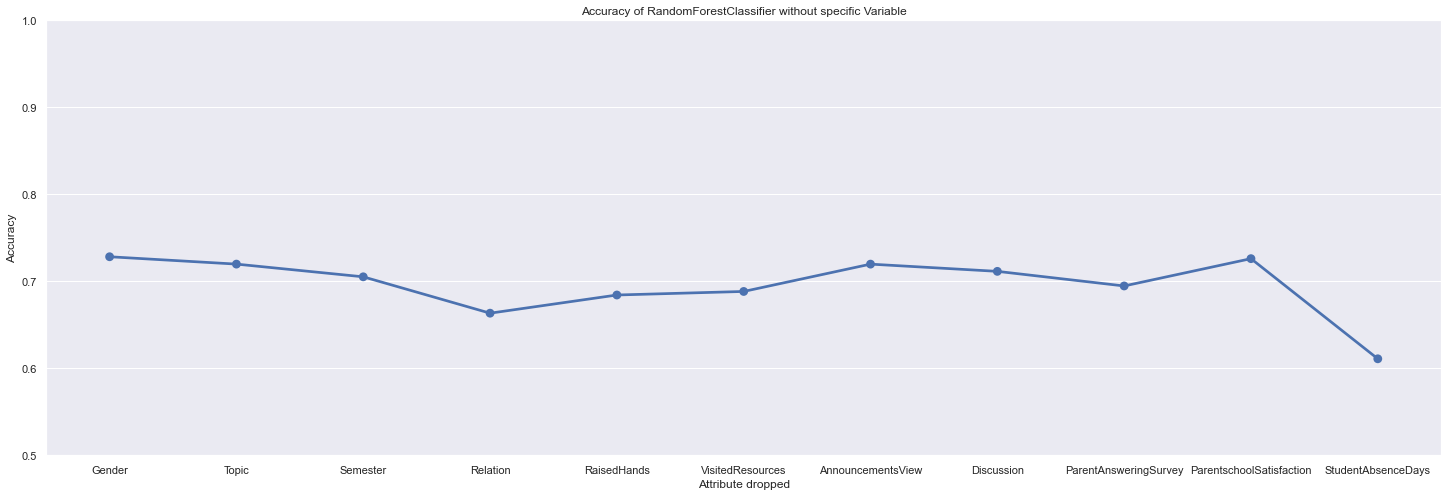

In [42]:
df_vis=pd.DataFrame(data_vis, index=['Attributes','Accuracy']).T

# Visualisation of the scores
plt.figure(figsize=(25,8))
h = sb.pointplot(x='Attributes', y = 'Accuracy', data=df_vis)
plt.title("Accuracy of RandomForestClassifier without specific Variable")
plt.xlabel("Attribute dropped")
plt.ylim(ymin=0.5,ymax=1)
plt.show()

# Conclusion

>- StudentAbsenceDays is an obvious outlier with lowest accuracy.

The result is StudentAbsenceDays having the highest impact.